# TASK 1

In [1]:
## imports
import gzip
import json
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import gensim.downloader as gensim_loader

In [2]:
## 1.1 & 1.2 Load goemotions

gzipFile = gzip.open("goemotions.json.gz", 'rt', encoding='UTF-8')
jsonFile = json.load(gzipFile)

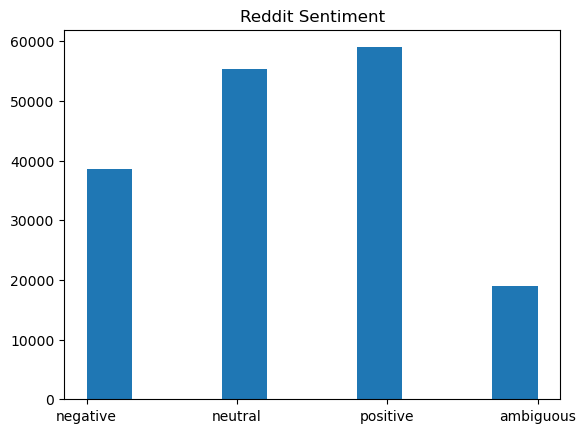

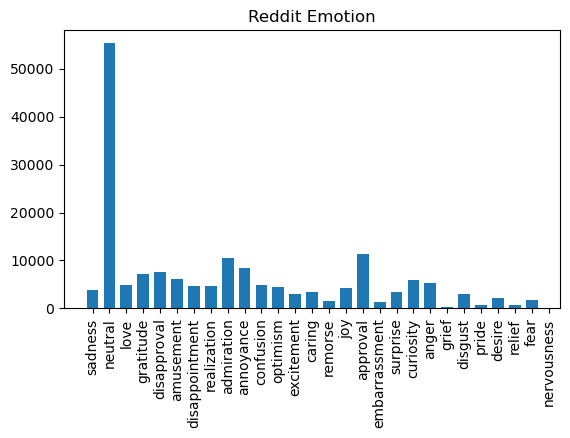

In [3]:
## 1.3 Extract posts and plot distributions

# plot data
postsOnlyArray = np.array(jsonFile)[:, 0]
emotionArray = np.array(jsonFile)[:, 1]
sentimentArray = np.array(jsonFile)[:, 2]

emotionsUniqueValues = list(set(emotionArray))
sentimentsUniqueValues = list(set(sentimentArray))

fig = plt.figure()
plt.title("Reddit Sentiment")
plt.hist(sentimentArray)
# plt.show()
fig.savefig('redditSentiment.png')

fig = plt.figure()
plt.title("Reddit Emotion")
plt.hist(emotionArray, rwidth=0.7, bins=np.arange(28)-0.5)
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)
# plt.show()
fig.savefig('redditEmotion.png')

# TASK 2

In [5]:
## 2.1 Vectorize dataset

vectorizer = CountVectorizer()
t = vectorizer.fit(postsOnlyArray)
tokenFrequencies = vectorizer.vocabulary_
vocabSize = len(tokenFrequencies)
print("Number of tokens in dataset: "+str(vocabSize))

Number of tokens in dataset: 30449


In [6]:
## 2.2 Split dataset

vectorizerTransformed = vectorizer.transform(postsOnlyArray)
x_train_emotion, x_test_emotion, y_train_emotion, y_test_emotion = train_test_split(vectorizerTransformed, emotionArray, test_size=0.2)
x_train_sentiment, x_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(vectorizerTransformed, sentimentArray, test_size=0.2)

In [7]:
## 2.3.1 Base-MNB Algo

base_mnb_algo_emotions = MultinomialNB()
base_mnb_algo_emotions.fit(x_train_emotion, y_train_emotion)
base_mnb_test_score_emotions = base_mnb_algo_emotions.score(x_test_emotion, y_test_emotion)
print("Base-MNB emotions accuracy: " + str(round(100 * base_mnb_test_score_emotions, 2)) + "%")

base_mnb_algo_sentiments = MultinomialNB()
base_mnb_algo_sentiments.fit(x_train_sentiment, y_train_sentiment)
base_mnb_test_score_sentiments = base_mnb_algo_sentiments.score(x_test_sentiment, y_test_sentiment)
print("Base-MNB sentiments accuracy: " + str(round(100 * base_mnb_test_score_sentiments, 2)) + "%")

Base-MNB emotions accuracy: 38.9%
Base-MNB sentiments accuracy: 54.2%


In [8]:
## 2.3.2 Base-DT algo

base_dt_algo_emotions = DecisionTreeClassifier()
base_dt_algo_emotions.fit(x_train_emotion, y_train_emotion)
base_dt_test_score_emotions = base_dt_algo_emotions.score(x_test_emotion, y_test_emotion)
print("Base-DT emotions accuracy: " + str(round(100 * base_dt_test_score_emotions, 2)) + "%")

base_dt_algo_sentiments = DecisionTreeClassifier()
base_dt_algo_sentiments.fit(x_train_sentiment, y_train_sentiment)
base_dt_test_score_sentiments = base_dt_algo_sentiments.score(x_test_sentiment, y_test_sentiment)
print("Base-DT sentiments accuracy: " + str(round(100 * base_dt_test_score_sentiments, 2)) + "%")

Base-DT emotions accuracy: 35.97%
Base-DT sentiments accuracy: 53.99%


In [9]:
## 2.3.3 Base-MLP

base_mlp_algo_emotions = MLPClassifier()
base_mlp_algo_emotions.fit(x_train_emotion, y_train_emotion)
base_mlp_test_score_emotions = base_mlp_algo_emotions.score(x_test_emotion, y_test_emotion)
print("Base-MLP emotions accuracy: " + str(round(100 * base_mlp_test_score_emotions, 2)) + "%")

base_mlp_algo_sentiments = MLPClassifier()
base_mlp_algo_sentiments.fit(x_train_sentiment, y_train_sentiment)
base_mlp_test_score_sentiments = base_mlp_algo_sentiments.score(x_test_sentiment, y_test_sentiment)
print("Base-MLP sentiments accuracy: " + str(round(100 * base_mlp_test_score_sentiments, 2)) + "%")

C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP emotions accuracy: 37.32%


C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP sentiments accuracy: 55.2%


In [10]:
## 2.3.4 Top-MNB

params = {
    'alpha':[0.5, 0, 2, 6]
}

top_mnb_algo_emotions = MultinomialNB()
top_mnb_gridsearch_emotions = GridSearchCV(estimator=top_mnb_algo_emotions, param_grid=params)
top_mnb_gridsearch_emotions.fit(x_train_emotion, y_train_emotion)
print("Top-MNB emotions best parameters: ")
print(top_mnb_gridsearch_emotions.best_estimator_)
top_mnb_test_score_emotions = top_mnb_gridsearch_emotions.score(x_test_emotion, y_test_emotion)
print("Top-MNB emotions accuracy: " + str(round(100 * top_mnb_test_score_emotions, 2)) + "%")

top_mnb_algo_sentiments = MultinomialNB()
top_mnb_gridsearch_sentiments = GridSearchCV(estimator=top_mnb_algo_sentiments, param_grid=params)
top_mnb_gridsearch_sentiments.fit(x_train_sentiment, y_train_sentiment)
print("Top-MNB sentiments best parameters: ")
print(top_mnb_gridsearch_sentiments.best_estimator_)
top_mnb_test_score_sentiments = top_mnb_gridsearch_sentiments.score(x_test_sentiment, y_test_sentiment)
print("Top-MNB sentiments accuracy: " + str(round(100 * top_mnb_test_score_sentiments, 2)) + "%")

Top-MNB emotions best parameters: 
MultinomialNB(alpha=0.5)
Top-MNB emotions accuracy: 39.33%


Top-MNB sentiments best parameters: 
MultinomialNB(alpha=0.5)
Top-MNB sentiments accuracy: 54.2%


In [13]:
## 2.3.5 Top-DT

params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [1, 4],
    'min_samples_split': [2, 4, 8]
}

top_dt_algo_emotions = DecisionTreeClassifier()
top_dt_gridsearch_emotions = GridSearchCV(estimator=top_dt_algo_emotions, param_grid=params)
top_dt_gridsearch_emotions.fit(x_train_emotion, y_train_emotion)
print("Top-DT emotions best parameters: ")
print(top_dt_gridsearch_emotions.best_estimator_)
top_dt_test_score_emotions = top_dt_gridsearch_emotions.score(x_test_emotion, y_test_emotion)
print("Top-DT emotions accuracy: " + str(round(100 * top_dt_test_score_emotions, 2)) + "%")

top_dt_algo_sentiments = DecisionTreeClassifier()
top_dt_gridsearch_sentiments = GridSearchCV(estimator=top_dt_algo_sentiments, param_grid=params)
top_dt_gridsearch_sentiments.fit(x_train_sentiment, y_train_sentiment)
print("Top-DT sentiments best parameters: ")
print(top_dt_gridsearch_sentiments.best_estimator_)
top_dt_test_score_sentiments = top_dt_gridsearch_sentiments.score(x_test_sentiment, y_test_sentiment)
print("Top-DT sentiments accuracy: " + str(round(100 * top_dt_test_score_sentiments, 2)) + "%")

Top-DT emotions best parameters: 
DecisionTreeClassifier(max_depth=4)
Top-DT emotions accuracy: 37.48%
Top-DT sentiments best parameters: 
DecisionTreeClassifier(max_depth=4, min_samples_split=4)
Top-DT sentiments accuracy: 38.39%


In [3]:
## 2.3.6 Top-MLP

params = {
    'activation': ["logistic", "tanh", "relu", "identity"],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ["adam", "sgd"],
    'max_iter': [3]
}

top_mlp_algo_emotions = MLPClassifier()
top_mlp_gridsearch_emotions = GridSearchCV(estimator=top_mlp_algo_emotions, param_grid=params)
top_mlp_gridsearch_emotions.fit(x_train_emotion, y_train_emotion)
print("Top-MLP emotions best parameters: ")
print(top_mlp_gridsearch_emotions.best_estimator_)
top_mlp_test_score_emotions = top_mlp_gridsearch_emotions.score(x_test_emotion, y_test_emotion)
print("Top-MLP emotions accuracy: " + str(round(100 * top_mlp_test_score_emotions, 2)) + "%")

top_mlp_algo_sentiments = MLPClassifier()
top_mlp_gridsearch_sentiments = GridSearchCV(estimator=top_mlp_algo_sentiments, param_grid=params, n_jobs=2)
top_mlp_gridsearch_sentiments.fit(x_train_sentiment, y_train_sentiment)
print("Top-MLP sentiments best parameters: ")
print(top_mlp_gridsearch_sentiments.best_estimator_)
top_mlp_test_score_sentiments = top_mlp_gridsearch_sentiments.score(x_test_sentiment, y_test_sentiment)
print("Top-MLP sentiments accuracy: " + str(round(100 * top_mlp_test_score_sentiments, 2)) + "%")

C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\mi

Top-MLP emotions best parameters: 
MLPClassifier(hidden_layer_sizes=(30, 50), max_iter=3)
Top-MLP emotions accuracy: 43.54%


C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


Top-MLP sentiments best parameters: 
MLPClassifier(hidden_layer_sizes=(30, 50), max_iter=3)
Top-MLP sentiments accuracy: 57.15%


In [62]:
## 2.4 Performance file (Part 1)

perfo_file = open("performance.txt", "w")
perfo_file.write("Base-MNB (emotion):\n")
perfo_file.write("Confusion matrix:\n")
base_mnb_emo_pred = base_mnb_algo_emotions.predict(x_test_emotion)
base_mnb_emo_conf_matrix = np.array(confusion_matrix(y_test_emotion, base_mnb_emo_pred))
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, base_mnb_emo_conf_matrix, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
base_mnb_emo_classif_report = classification_report(y_test_emotion, base_mnb_emo_pred, labels=emotionsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
emotions_count = 0
for key in base_mnb_emo_classif_report:
    if emotions_count == 28:
        break
    emotions_count += 1
    perfo_file.write(key + ": Precision = " + str(base_mnb_emo_classif_report[key]["precision"])+ ", Recall = " + str(base_mnb_emo_classif_report[key]["recall"])+ ", F1-measure = " + str(base_mnb_emo_classif_report[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(base_mnb_emo_classif_report["accuracy"])+ ", Macro-average F1 = " + str(base_mnb_emo_classif_report["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(base_mnb_emo_classif_report["weighted avg"]["f1-score"])+ "\n\n")


perfo_file.write("Base-MNB (sentiment):\n")
perfo_file.write("Confusion matrix:\n")
base_mnb_senti_pred = base_mnb_algo_sentiments.predict(x_test_emotion)
base_mnb_senti_conf_matrix = confusion_matrix(y_test_sentiment, base_mnb_senti_pred)
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, base_mnb_senti_conf_matrix, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
base_mnb_senti_classif_report = classification_report(y_test_sentiment, base_mnb_senti_pred, labels=sentimentsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
sentiments_count = 0
for key in base_mnb_senti_classif_report:
    if sentiments_count == 4:
        break
    sentiments_count += 1
    perfo_file.write(key + ": Precision = " + str(base_mnb_senti_classif_report[key]["precision"])+ ", Recall = " + str(base_mnb_senti_classif_report[key]["recall"])+ ", F1-measure = " + str(base_mnb_senti_classif_report[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(base_mnb_senti_classif_report["accuracy"])+ ", Macro-average F1 = " + str(base_mnb_senti_classif_report["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(base_mnb_senti_classif_report["weighted avg"]["f1-score"])+ "\n\n")

perfo_file.write("Base-DT (emotion):\n")
perfo_file.write("Confusion matrix:\n")
base_dt_emo_pred = base_dt_algo_emotions.predict(x_test_emotion)
base_dt_emo_conf_matrix = confusion_matrix(y_test_emotion, base_dt_emo_pred)
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, base_dt_emo_conf_matrix, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
base_dt_emo_classif_report = classification_report(y_test_emotion, base_dt_emo_pred, labels=emotionsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
emotions_count = 0
for key in base_dt_emo_classif_report:
    if emotions_count == 28:
        break
    emotions_count += 1
    perfo_file.write(key + ": Precision = " + str(base_dt_emo_classif_report[key]["precision"])+ ", Recall = " + str(base_dt_emo_classif_report[key]["recall"])+ ", F1-measure = " + str(base_dt_emo_classif_report[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(base_dt_emo_classif_report["accuracy"])+ ", Macro-average F1 = " + str(base_dt_emo_classif_report["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(base_dt_emo_classif_report["weighted avg"]["f1-score"])+ "\n\n")

perfo_file.write("Base-DT (sentiment):\n")
perfo_file.write("Confusion matrix:\n")
base_dt_senti_pred = base_dt_algo_sentiments.predict(x_test_emotion)
base_dt_senti_conf_matrix = confusion_matrix(y_test_sentiment, base_dt_senti_pred)
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, base_dt_senti_conf_matrix, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
base_dt_senti_classif_report = classification_report(y_test_sentiment, base_dt_senti_pred, labels=sentimentsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
sentiments_count = 0
for key in base_dt_senti_classif_report:
    if sentiments_count == 4:
        break
    sentiments_count += 1
    perfo_file.write(key + ": Precision = " + str(base_dt_senti_classif_report[key]["precision"])+ ", Recall = " + str(base_dt_senti_classif_report[key]["recall"])+ ", F1-measure = " + str(base_dt_senti_classif_report[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(base_dt_senti_classif_report["accuracy"])+ ", Macro-average F1 = " + str(base_dt_senti_classif_report["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(base_dt_senti_classif_report["weighted avg"]["f1-score"])+ "\n\n")

perfo_file.write("Base-MLP (emotion):\n")
perfo_file.write("Confusion matrix:\n")
base_mlp_emo_pred = base_mlp_algo_emotions.predict(x_test_emotion)
base_mlp_emo_conf_matrix = confusion_matrix(y_test_emotion, base_mlp_emo_pred)
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, base_mlp_emo_conf_matrix, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
base_mlp_emo_classif_report = classification_report(y_test_emotion, base_mlp_emo_pred, labels=emotionsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
emotions_count = 0
for key in base_mlp_emo_classif_report:
    if emotions_count == 28:
        break
    emotions_count += 1
    perfo_file.write(key + ": Precision = " + str(base_mlp_emo_classif_report[key]["precision"])+ ", Recall = " + str(base_mlp_emo_classif_report[key]["recall"])+ ", F1-measure = " + str(base_mlp_emo_classif_report[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(base_mlp_emo_classif_report["accuracy"])+ ", Macro-average F1 = " + str(base_mlp_emo_classif_report["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(base_mlp_emo_classif_report["weighted avg"]["f1-score"])+ "\n\n")

perfo_file.write("Base-MLP (sentiment):\n")
perfo_file.write("Confusion matrix:\n")
base_mlp_senti_pred = base_mlp_algo_sentiments.predict(x_test_emotion)
base_mlp_senti_conf_matrix = confusion_matrix(y_test_sentiment, base_mlp_senti_pred)
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, base_mlp_senti_conf_matrix, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
base_mlp_senti_classif_report = classification_report(y_test_sentiment, base_mlp_senti_pred, labels=sentimentsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
sentiments_count = 0
for key in base_mlp_senti_classif_report:
    if sentiments_count == 4:
        break
    sentiments_count += 1
    perfo_file.write(key + ": Precision = " + str(base_mlp_senti_classif_report[key]["precision"])+ ", Recall = " + str(base_mlp_senti_classif_report[key]["recall"])+ ", F1-measure = " + str(base_mlp_senti_classif_report[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(base_mlp_senti_classif_report["accuracy"])+ ", Macro-average F1 = " + str(base_mlp_senti_classif_report["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(base_mlp_senti_classif_report["weighted avg"]["f1-score"])+ "\n\n")

perfo_file.write("Top-MNB ")
top_mnb_emo_best_estimator = top_mnb_gridsearch_emotions.best_estimator_
top_mnb_emo_best_params = top_mnb_gridsearch_emotions.best_params_
perfo_file.write(str(top_mnb_emo_best_params) + " (emotion):\n")
perfo_file.write("Confusion matrix:\n")
top_mnb_emo_pred = top_mnb_emo_best_estimator.predict(x_test_emotion)
top_mnb_emo_conf_matrix = confusion_matrix(y_test_emotion, top_mnb_emo_pred)
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, top_mnb_emo_conf_matrix, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
top_mnb_emo_classif_report = classification_report(y_test_emotion, top_mnb_emo_pred, labels=emotionsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
emotions_count = 0
for key in top_mnb_emo_classif_report:
    if emotions_count == 28:
        break
    emotions_count += 1
    perfo_file.write(key + ": Precision = " + str(top_mnb_emo_classif_report[key]["precision"])+ ", Recall = " + str(top_mnb_emo_classif_report[key]["recall"])+ ", F1-measure = " + str(top_mnb_emo_classif_report[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(top_mnb_emo_classif_report["accuracy"])+ ", Macro-average F1 = " + str(top_mnb_emo_classif_report["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(top_mnb_emo_classif_report["weighted avg"]["f1-score"])+ "\n\n")

perfo_file.write("Top-MNB ")
top_mnb_senti_best_estimator = top_mnb_gridsearch_sentiments.best_estimator_
top_mnb_senti_best_params = top_mnb_gridsearch_sentiments.best_params_
perfo_file.write(str(top_mnb_senti_best_params) + " (sentiment):\n")
perfo_file.write("Confusion matrix:\n")
top_mnb_senti_pred = top_mnb_senti_best_estimator.predict(x_test_sentiment)
top_mnb_senti_conf_matrix = confusion_matrix(y_test_sentiment, top_mnb_senti_pred)
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, top_mnb_senti_conf_matrix, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
top_mnb_senti_classif_report = classification_report(y_test_sentiment, top_mnb_senti_pred, labels=sentimentsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
sentiments_count = 0
for key in top_mnb_senti_classif_report:
    if sentiments_count == 4:
        break
    sentiments_count += 1
    perfo_file.write(key + ": Precision = " + str(top_mnb_senti_classif_report[key]["precision"])+ ", Recall = " + str(top_mnb_senti_classif_report[key]["recall"])+ ", F1-measure = " + str(top_mnb_senti_classif_report[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(top_mnb_senti_classif_report["accuracy"])+ ", Macro-average F1 = " + str(top_mnb_senti_classif_report["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(top_mnb_senti_classif_report["weighted avg"]["f1-score"])+ "\n\n")

perfo_file.write("Top-DT ")
top_dt_emo_best_estimator = top_dt_gridsearch_emotions.best_estimator_
top_dt_emo_best_params = top_dt_gridsearch_emotions.best_params_
perfo_file.write(str(top_dt_emo_best_params) + " (emotion):\n")
perfo_file.write("Confusion matrix:\n")
top_dt_emo_pred = top_dt_emo_best_estimator.predict(x_test_emotion)
top_dt_emo_conf_matrix = np.array(confusion_matrix(y_test_emotion, top_dt_emo_pred))
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, top_dt_emo_conf_matrix, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
top_dt_emo_classif_report = classification_report(y_test_emotion, top_dt_emo_pred, labels=emotionsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
emotions_count = 0
for key in top_dt_emo_classif_report:
    if emotions_count == 28:
        break
    emotions_count += 1
    perfo_file.write(key + ": Precision = " + str(top_dt_emo_classif_report[key]["precision"])+ ", Recall = " + str(top_dt_emo_classif_report[key]["recall"])+ ", F1-measure = " + str(top_dt_emo_classif_report[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(top_dt_emo_classif_report["accuracy"])+ ", Macro-average F1 = " + str(top_dt_emo_classif_report["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(top_dt_emo_classif_report["weighted avg"]["f1-score"])+ "\n\n")

perfo_file.write("Top-DT ")
top_dt_senti_best_estimator = top_dt_gridsearch_sentiments.best_estimator_
top_dt_senti_best_params = top_dt_gridsearch_sentiments.best_params_
perfo_file.write(str(top_dt_senti_best_params) + " (sentiment):\n")
perfo_file.write("Confusion matrix:\n")
top_dt_senti_pred = top_dt_senti_best_estimator.predict(x_test_sentiment)
top_dt_senti_conf_matrix = confusion_matrix(y_test_sentiment, top_dt_senti_pred)
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, top_dt_senti_conf_matrix, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
top_dt_senti_classif_report = classification_report(y_test_sentiment, top_dt_senti_pred, labels=sentimentsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
sentiments_count = 0
for key in top_dt_senti_classif_report:
    if sentiments_count == 4:
        break
    sentiments_count += 1
    perfo_file.write(key + ": Precision = " + str(top_dt_senti_classif_report[key]["precision"])+ ", Recall = " + str(top_dt_senti_classif_report[key]["recall"])+ ", F1-measure = " + str(top_dt_senti_classif_report[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(top_dt_senti_classif_report["accuracy"])+ ", Macro-average F1 = " + str(top_dt_senti_classif_report["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(top_dt_senti_classif_report["weighted avg"]["f1-score"])+ "\n\n")

perfo_file.write("Top-MLP ")
top_mlp_emo_best_estimator = top_mlp_gridsearch_emotions.best_estimator_
top_mlp_emo_best_params = top_mlp_gridsearch_emotions.best_params_
perfo_file.write(str(top_mlp_emo_best_params) + " (emotion):\n")
perfo_file.write("Confusion matrix:\n")
top_mlp_emo_pred = top_mlp_emo_best_estimator.predict(x_test_emotion)
top_mlp_emo_conf_matrix = confusion_matrix(y_test_emotion, top_mlp_emo_pred)
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, top_mlp_emo_conf_matrix, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
top_mlp_emo_classif_report = classification_report(y_test_emotion, top_mlp_emo_pred, labels=emotionsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
emotions_count = 0
for key in top_mlp_emo_classif_report:
    if emotions_count == 28:
        break
    emotions_count += 1
    perfo_file.write(key + ": Precision = " + str(top_mlp_emo_classif_report[key]["precision"])+ ", Recall = " + str(top_mlp_emo_classif_report[key]["recall"])+ ", F1-measure = " + str(top_mlp_emo_classif_report[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(top_mlp_emo_classif_report["accuracy"])+ ", Macro-average F1 = " + str(top_mlp_emo_classif_report["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(top_mlp_emo_classif_report["weighted avg"]["f1-score"])+ "\n\n")

perfo_file.write("Top-MLP ")
top_mlp_senti_best_estimator = top_mlp_gridsearch_sentiments.best_estimator_
top_mlp_senti_best_params = top_mlp_gridsearch_sentiments.best_params_
perfo_file.write(str(top_mlp_senti_best_params) + " (sentiment):\n")
perfo_file.write("Confusion matrix:\n")
top_mlp_senti_pred = top_mlp_senti_best_estimator.predict(x_test_sentiment)
top_mlp_senti_conf_matrix = confusion_matrix(y_test_sentiment, top_mlp_senti_pred)
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, top_mlp_senti_conf_matrix, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
top_mlp_senti_classif_report = classification_report(y_test_sentiment, top_mlp_senti_pred, labels=sentimentsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
sentiments_count = 0
for key in top_mlp_senti_classif_report:
    if sentiments_count == 4:
        break
    sentiments_count += 1
    perfo_file.write(key + ": Precision = " + str(top_mlp_senti_classif_report[key]["precision"])+ ", Recall = " + str(top_mlp_senti_classif_report[key]["recall"])+ ", F1-measure = " + str(top_mlp_senti_classif_report[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(top_mlp_senti_classif_report["accuracy"])+ ", Macro-average F1 = " + str(top_mlp_senti_classif_report["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(top_mlp_senti_classif_report["weighted avg"]["f1-score"])+ "\n")

perfo_file.close()

C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\User

In [63]:
## 2.5 Re-run all previous algorithms with stop words removed

#vectorizing dataset
vectorizer = CountVectorizer(stop_words='english')
t = vectorizer.fit(postsOnlyArray)

#splitting test and train sets
vectorizerTransformed = vectorizer.transform(postsOnlyArray)
x_train_emotion, x_test_emotion, y_train_emotion, y_test_emotion = train_test_split(vectorizerTransformed, emotionArray, test_size=0.2)
x_train_sentiment, x_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(vectorizerTransformed, sentimentArray, test_size=0.2)

In [64]:
#Base-MNB

base_mnb_algo_emotions = MultinomialNB()
base_mnb_algo_emotions.fit(x_train_emotion, y_train_emotion)
base_mnb_test_score_emotions = base_mnb_algo_emotions.score(x_test_emotion, y_test_emotion)
print("Base-MNB emotions accuracy: " + str(round(100 * base_mnb_test_score_emotions, 2)) + "%")

base_mnb_algo_sentiments = MultinomialNB()
base_mnb_algo_sentiments.fit(x_train_sentiment, y_train_sentiment)
base_mnb_test_score_sentiments = base_mnb_algo_sentiments.score(x_test_sentiment, y_test_sentiment)
print("Base-MNB sentiments accuracy: " + str(round(100 * base_mnb_test_score_sentiments, 2)) + "%")

Base-MNB emotions accuracy: 38.68%
Base-MNB sentiments accuracy: 53.72%


In [65]:
#Base-DT

base_dt_algo_emotions = DecisionTreeClassifier()
base_dt_algo_emotions.fit(x_train_emotion, y_train_emotion)
base_dt_test_score_emotions = base_dt_algo_emotions.score(x_test_emotion, y_test_emotion)
print("Base-DT emotions accuracy: " + str(round(100 * base_dt_test_score_emotions, 2)) + "%")

base_dt_algo_sentiments = DecisionTreeClassifier()
base_dt_algo_sentiments.fit(x_train_sentiment, y_train_sentiment)
base_dt_test_score_sentiments = base_dt_algo_sentiments.score(x_test_sentiment, y_test_sentiment)
print("Base-DT sentiments accuracy: " + str(round(100 * base_dt_test_score_sentiments, 2)) + "%")

Base-DT emotions accuracy: 35.91%
Base-DT sentiments accuracy: 53.94%


In [67]:
#Base-MLP

base_mlp_algo_emotions = MLPClassifier(max_iter = 3)
base_mlp_algo_emotions.fit(x_train_emotion, y_train_emotion)
base_mlp_test_score_emotions = base_mlp_algo_emotions.score(x_test_emotion, y_test_emotion)
print("Base-MLP emotions accuracy: " + str(round(100 * base_mlp_test_score_emotions, 2)) + "%")

base_mlp_algo_sentiments = MLPClassifier(max_iter = 3)
base_mlp_algo_sentiments.fit(x_train_sentiment, y_train_sentiment)
base_mlp_test_score_sentiments = base_mlp_algo_sentiments.score(x_test_sentiment, y_test_sentiment)
print("Base-MLP sentiments accuracy: " + str(round(100 * base_mlp_test_score_sentiments, 2)) + "%")

C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP emotions accuracy: 42.62%


C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP sentiments accuracy: 56.62%


In [68]:
#Top-MNB

params = {
    'alpha':[0.5, 0, 2, 6]
}

top_mnb_algo_emotions = MultinomialNB()
top_mnb_gridsearch_emotions = GridSearchCV(estimator=top_mnb_algo_emotions, param_grid=params)
top_mnb_gridsearch_emotions.fit(x_train_emotion, y_train_emotion)
print("Top-MNB emotions best parameters: ")
print(top_mnb_gridsearch_emotions.best_estimator_)
top_mnb_test_score_emotions = top_mnb_gridsearch_emotions.score(x_test_emotion, y_test_emotion)
print("Top-MNB emotions accuracy: " + str(round(100 * top_mnb_test_score_emotions, 2)) + "%")

top_mnb_algo_sentiments = MultinomialNB()
top_mnb_gridsearch_sentiments = GridSearchCV(estimator=top_mnb_algo_sentiments, param_grid=params)
top_mnb_gridsearch_sentiments.fit(x_train_sentiment, y_train_sentiment)
print("Top-MNB sentiments best parameters: ")
print(top_mnb_gridsearch_sentiments.best_estimator_)
top_mnb_test_score_sentiments = top_mnb_gridsearch_sentiments.score(x_test_sentiment, y_test_sentiment)
print("Top-MNB sentiments accuracy: " + str(round(100 * top_mnb_test_score_sentiments, 2)) + "%")

Top-MNB emotions best parameters: 
MultinomialNB(alpha=0.5)
Top-MNB emotions accuracy: 38.78%


Top-MNB sentiments best parameters: 
MultinomialNB(alpha=2)
Top-MNB sentiments accuracy: 53.49%


In [69]:
#Top-DT

params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [1, 4],
    'min_samples_split': [2, 4, 8]
}

top_dt_algo_emotions = DecisionTreeClassifier()
top_dt_gridsearch_emotions = GridSearchCV(estimator=top_dt_algo_emotions, param_grid=params)
top_dt_gridsearch_emotions.fit(x_train_emotion, y_train_emotion)
print("Top-DT emotions best parameters: ")
print(top_dt_gridsearch_emotions.best_estimator_)
top_dt_test_score_emotions = top_dt_gridsearch_emotions.score(x_test_emotion, y_test_emotion)
print("Top-DT emotions accuracy: " + str(round(100 * top_dt_test_score_emotions, 2)) + "%")

top_dt_algo_sentiments = DecisionTreeClassifier()
top_dt_gridsearch_sentiments = GridSearchCV(estimator=top_dt_algo_sentiments, param_grid=params)
top_dt_gridsearch_sentiments.fit(x_train_sentiment, y_train_sentiment)
print("Top-DT sentiments best parameters: ")
print(top_dt_gridsearch_sentiments.best_estimator_)
top_dt_test_score_sentiments = top_dt_gridsearch_sentiments.score(x_test_sentiment, y_test_sentiment)
print("Top-DT sentiments accuracy: " + str(round(100 * top_dt_test_score_sentiments, 2)) + "%")

Top-DT emotions best parameters: 
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=4)
Top-DT emotions accuracy: 37.26%
Top-DT sentiments best parameters: 
DecisionTreeClassifier(max_depth=4)
Top-DT sentiments accuracy: 38.89%


In [70]:
#Top-MLP

params = {
    'activation': ["logistic", "tanh", "relu", "identity"],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ["adam", "sgd"],
    'max_iter': [3]
}
top_mlp_algo_emotions = MLPClassifier()
top_mlp_gridsearch_emotions = GridSearchCV(estimator=top_mlp_algo_emotions, param_grid=params)
top_mlp_gridsearch_emotions.fit(x_train_emotion, y_train_emotion)
print("Top-MLP emotions best parameters: ")
print(top_mlp_gridsearch_emotions.best_estimator_)
top_mlp_test_score_emotions = top_mlp_gridsearch_emotions.score(x_test_emotion, y_test_emotion)
print("Top-MLP emotions accuracy: " + str(round(100 * top_mlp_test_score_emotions, 2)) + "%")

top_mlp_algo_sentiments = MLPClassifier()
top_mlp_gridsearch_sentiments = GridSearchCV(estimator=top_mlp_algo_sentiments, param_grid=params)
top_mlp_gridsearch_sentiments.fit(x_train_sentiment, y_train_sentiment)
print("Top-MLP sentiments best parameters: ")
print(top_mlp_gridsearch_sentiments.best_estimator_)
top_mlp_test_score_sentiments = top_mlp_gridsearch_sentiments.score(x_test_sentiment, y_test_sentiment)
print("Top-MLP sentiments accuracy: " + str(round(100 * top_mlp_test_score_sentiments, 2)) + "%")

C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\mi

Top-MLP emotions best parameters: 
MLPClassifier(hidden_layer_sizes=(30, 50), max_iter=3)
Top-MLP emotions accuracy: 42.56%


C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\mi

Top-MLP sentiments best parameters: 
MLPClassifier(hidden_layer_sizes=(30, 50), max_iter=3)
Top-MLP sentiments accuracy: 56.55%


# Task 3

In [ ]:
## 3.1 Load word2vec-google-news-300
word2vec_model = gensim_loader.load("word2vec-google-news-300")

In [4]:
## 3.2 Use NLTK to extract words from Reddit posts

nltk.download('punkt')
tokenized_posts = []
vocab_dict = {}
token_count = 0

for post in postsOnlyArray:
    tokenized_post = word_tokenize(post)
    tokenized_posts.append(tokenized_post)

x_train_emotion, x_test_emotion, y_train_emotion, y_test_emotion = train_test_split(tokenized_posts, emotionArray, test_size=0.2)
unique_emotions_list = []
for row in x_train_emotion:
    for elem in row:
        unique_emotions_list.append(elem)
unique_emotions_list = list(set(unique_emotions_list))
emotion_training_size = len(unique_emotions_list)

x_train_sentiment, x_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(tokenized_posts, sentimentArray, test_size=0.2)
unique_sentiments_list = []
for row in x_train_sentiment:
    for elem in row:
        unique_sentiments_list.append(elem)
unique_sentiments_list = list(set(unique_sentiments_list))
sentiment_training_size = len(unique_sentiments_list)

print("Emotion training set size: " + str(emotion_training_size))
print("Sentiment training set size: " + str(sentiment_training_size))

Emotion training set size: 41008
Sentiment training set size: 41022


In [9]:
## 3.3 Compute embeddings

#embeddings for training set (emotion)
total_words_train_emo = 0
nb_embedding_hit_train_emo = 0
for index in range(len(x_train_emotion)):
    post = x_train_emotion[index]
    nb_successful_embeddings = 0
    sum_vectors = np.zeros(300)
    for word in post:
        total_words_train_emo += 1
        try:
            word_embedding = word2vec_model[word]
            sum_vectors = np.add(sum_vectors, word_embedding)
            nb_successful_embeddings += 1
        except KeyError:
            pass
    nb_embedding_hit_train_emo += nb_successful_embeddings
    if nb_successful_embeddings != 0:
        avg_embedding = np.true_divide(sum_vectors, nb_successful_embeddings)
        x_train_emotion[index] = avg_embedding
    else:
        x_train_emotion[index] = sum_vectors

#embeddings for test set (emotion)
total_words_test_emo = 0
nb_embedding_hit_test_emo = 0
for index in range(len(x_test_emotion)):
    post = x_test_emotion[index]
    nb_successful_embeddings = 0
    sum_vectors = np.zeros(300)
    for word in post:
        total_words_test_emo += 1
        try:
            word_embedding = word2vec_model[word]
            sum_vectors = np.add(sum_vectors, word_embedding)
            nb_successful_embeddings += 1
        except KeyError:
            pass
    nb_embedding_hit_test_emo += nb_successful_embeddings
    if nb_successful_embeddings != 0:
        avg_embedding = np.true_divide(sum_vectors, nb_successful_embeddings)
        x_test_emotion[index] = avg_embedding
    else:
        x_test_emotion[index] = sum_vectors

#embeddings for training set (sentiment)
total_words_train_senti = 0
nb_embedding_hit_train_senti = 0
for index in range(len(x_train_sentiment)):
    post = x_train_sentiment[index]
    nb_successful_embeddings = 0
    sum_vectors = np.zeros(300)
    for word in post:
        total_words_train_senti += 1
        try:
            word_embedding = word2vec_model[word]
            sum_vectors = np.add(sum_vectors, word_embedding)
            nb_successful_embeddings += 1
        except KeyError:
            pass
    nb_embedding_hit_train_senti += nb_successful_embeddings
    if nb_successful_embeddings != 0:
        avg_embedding = np.true_divide(sum_vectors, nb_successful_embeddings)
        x_train_sentiment[index] = avg_embedding
    else:
        x_train_sentiment[index] = sum_vectors

#embeddings for test set (sentiment)
total_words_test_senti = 0
nb_embedding_hit_test_senti = 0
for index in range(len(x_test_sentiment)):
    post = x_test_sentiment[index]
    nb_successful_embeddings = 0
    sum_vectors = np.zeros(300)
    for word in post:
        total_words_test_senti += 1
        try:
            word_embedding = word2vec_model[word]
            sum_vectors = np.add(sum_vectors, word_embedding)
            nb_successful_embeddings += 1
        except KeyError:
            pass
    nb_embedding_hit_test_senti += nb_successful_embeddings
    if nb_successful_embeddings != 0:
        avg_embedding = np.true_divide(sum_vectors, nb_successful_embeddings)
        x_test_sentiment[index] = avg_embedding
    else:
        x_test_sentiment[index] = sum_vectors

In [10]:
## 3.4 Compute embeddings hit rates

hit_r_train_emo = 100 * nb_embedding_hit_train_emo / total_words_train_emo
hit_r_test_emo = 100 * nb_embedding_hit_test_emo / total_words_test_emo
hit_r_train_senti = 100 * nb_embedding_hit_train_senti / total_words_train_senti
hit_r_test_senti =  100 * nb_embedding_hit_test_senti / total_words_test_senti

print("Hit rate training set: "+str((hit_r_train_emo + hit_r_train_senti) / 2)+"%")
print("Hit rate test set: "+str((hit_r_test_emo + hit_r_test_senti) / 2)+"%")

Hit rate training set: 77.44154428278%
Hit rate test set: 77.48700910174152%


In [11]:
## 3.5 Base-MLP

base_mlp_algo_emotions_emb = MLPClassifier()
base_mlp_algo_emotions_emb.fit(x_train_emotion, y_train_emotion)
base_mlp_test_score_emotions_embed = base_mlp_algo_emotions_emb.score(x_test_emotion, y_test_emotion)
print("Base-MLP emotions accuracy: " + str(round(100 * base_mlp_test_score_emotions_embed, 2)) + "%")

base_mlp_algo_sentiments_emb = MLPClassifier()
base_mlp_algo_sentiments_emb.fit(x_train_sentiment, y_train_sentiment)
base_mlp_test_score_sentiments_emb = base_mlp_algo_sentiments_emb.score(x_test_sentiment, y_test_sentiment)
print("Base-MLP sentiments accuracy: " + str(round(100 * base_mlp_test_score_sentiments_emb, 2)) + "%")

C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP emotions accuracy: 41.65%


C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP sentiments accuracy: 54.0%


In [12]:
## 3.6 Top-MLP

params = {
    'activation': ["logistic", "tanh", "relu", "identity"],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ["adam", "sgd"],
    'max_iter': [3]
}

top_mlp_algo_emotions_emb = MLPClassifier()
top_mlp_gridsearch_emotions_emb = GridSearchCV(estimator=top_mlp_algo_emotions_emb, param_grid=params)
top_mlp_gridsearch_emotions_emb.fit(x_train_emotion, y_train_emotion)
print("Top-MLP emotions best parameters: ")
print(top_mlp_gridsearch_emotions_emb.best_estimator_)
top_mlp_test_score_emotions_emb = top_mlp_gridsearch_emotions_emb.score(x_test_emotion, y_test_emotion)
print("Top-MLP emotions accuracy: " + str(round(100 * top_mlp_test_score_emotions_emb, 2)) + "%")

top_mlp_algo_sentiments_emb = MLPClassifier()
top_mlp_gridsearch_sentiments_emb = GridSearchCV(estimator=top_mlp_algo_sentiments_emb, param_grid=params)
top_mlp_gridsearch_sentiments_emb.fit(x_train_sentiment, y_train_sentiment)
print("Top-MLP sentiments best parameters: ")
print(top_mlp_gridsearch_sentiments_emb.best_estimator_)
top_mlp_test_score_sentiments_emb = top_mlp_gridsearch_sentiments_emb.score(x_test_sentiment, y_test_sentiment)
print("Top-MLP sentiments accuracy: " + str(round(100 * top_mlp_test_score_sentiments_emb, 2)) + "%")

C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\mi

Top-MLP emotions best parameters: 
MLPClassifier(hidden_layer_sizes=(30, 50), max_iter=3)
Top-MLP emotions accuracy: 39.52%


C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Marc\mi

Top-MLP sentiments best parameters: 
MLPClassifier(hidden_layer_sizes=(30, 50), max_iter=3)
Top-MLP sentiments accuracy: 51.92%


In [15]:
## 3.7 Performance file
perfo_file = open("performance.txt", "a")

perfo_file.write("Base-MLP embeddings (emotion):\n")
perfo_file.write("Confusion matrix:\n")
base_mlp_emo_pred_emb = base_mlp_algo_emotions_emb.predict(x_test_emotion)
base_mlp_emo_conf_matrix_emb = confusion_matrix(y_test_emotion, base_mlp_emo_pred_emb)
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, base_mlp_emo_conf_matrix_emb, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
base_mlp_emo_classif_report_emb = classification_report(y_test_emotion, base_mlp_emo_pred_emb, labels=emotionsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
emotions_count = 0
for key in base_mlp_emo_classif_report_emb:
    if emotions_count == 4:
        break
    emotions_count += 1
    perfo_file.write(key + ": Precision = " + str(base_mlp_emo_classif_report_emb[key]["precision"])+ ", Recall = " + str(base_mlp_emo_classif_report_emb[key]["recall"])+ ", F1-measure = " + str(base_mlp_emo_classif_report_emb[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(base_mlp_emo_classif_report_emb["accuracy"])+ ", Macro-average F1 = " + str(base_mlp_emo_classif_report_emb["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(base_mlp_emo_classif_report_emb["weighted avg"]["f1-score"])+ "\n\n")

perfo_file.write("Base-MLP embeddings (sentiment):\n")
perfo_file.write("Confusion matrix:\n")
base_mlp_senti_pred_emb = base_mlp_algo_sentiments_emb.predict(x_test_sentiment)
base_mlp_senti_conf_matrix_emb = confusion_matrix(y_test_sentiment, base_mlp_senti_pred_emb)
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, base_mlp_senti_conf_matrix_emb, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
base_mlp_senti_classif_report_emb = classification_report(y_test_sentiment, base_mlp_senti_pred_emb, labels=sentimentsUniqueValues, output_dict = True)
print(base_mlp_senti_classif_report_emb)
perfo_file.write("Classification report:\n")
sentiments_count = 0
for key in base_mlp_senti_classif_report_emb:
    if sentiments_count == 4:
        break
    sentiments_count += 1
    perfo_file.write(key + ": Precision = " + str(base_mlp_senti_classif_report_emb[key]["precision"])+ ", Recall = " + str(base_mlp_senti_classif_report_emb[key]["recall"])+ ", F1-measure = " + str(base_mlp_senti_classif_report_emb[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(base_mlp_senti_classif_report_emb["accuracy"])+ ", Macro-average F1 = " + str(base_mlp_senti_classif_report_emb["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(base_mlp_senti_classif_report_emb["weighted avg"]["f1-score"])+ "\n\n")

perfo_file.write("Top-MLP embeddings")
top_mlp_emo_best_estimator_emb = top_mlp_gridsearch_emotions_emb.best_estimator_
top_mlp_emo_best_params_emb = top_mlp_gridsearch_emotions_emb.best_params_
perfo_file.write(str(top_mlp_emo_best_params_emb) + " (emotion):\n")
perfo_file.write("Confusion matrix:\n")
top_mlp_emo_pred_emb = top_mlp_emo_best_estimator_emb.predict(x_test_emotion)
top_mlp_emo_conf_matrix_emb = confusion_matrix(y_test_emotion, top_mlp_emo_pred_emb)
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, top_mlp_emo_conf_matrix_emb, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
top_mlp_emo_classif_report_emb = classification_report(y_test_emotion, top_mlp_emo_pred_emb, labels=emotionsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
emotions_count = 0
for key in top_mlp_emo_classif_report_emb:
    if emotions_count == 4:
        break
    emotions_count += 1
    perfo_file.write(key + ": Precision = " + str(top_mlp_emo_classif_report_emb[key]["precision"])+ ", Recall = " + str(top_mlp_emo_classif_report_emb[key]["recall"])+ ", F1-measure = " + str(top_mlp_emo_classif_report_emb[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(top_mlp_emo_classif_report_emb["accuracy"])+ ", Macro-average F1 = " + str(top_mlp_emo_classif_report_emb["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(top_mlp_emo_classif_report_emb["weighted avg"]["f1-score"])+ "\n\n")

perfo_file.write("Top-MLP embeddings")
top_mlp_senti_best_estimator_emb = top_mlp_gridsearch_sentiments_emb.best_estimator_
top_mlp_senti_best_params_emb = top_mlp_gridsearch_sentiments_emb.best_params_
perfo_file.write(str(top_mlp_senti_best_params_emb) + " (sentiment):\n")
perfo_file.write("Confusion matrix:\n")
top_mlp_senti_pred_emb = top_mlp_senti_best_estimator_emb.predict(x_test_sentiment)
top_mlp_senti_conf_matrix_emb = confusion_matrix(y_test_sentiment, top_mlp_senti_pred_emb)
perfo_file.close()
perfo_file = open("performance.txt", "ab")
np.savetxt(perfo_file, top_mlp_senti_conf_matrix_emb, fmt='%-7.1f')
perfo_file.close()
perfo_file = open("performance.txt", "a")
top_mlp_senti_classif_report_emb = classification_report(y_test_sentiment, top_mlp_senti_pred_emb, labels=sentimentsUniqueValues, output_dict = True)
perfo_file.write("Classification report:\n")
sentiments_count = 0
for key in top_mlp_senti_classif_report_emb:
    if sentiments_count == 4:
        break
    sentiments_count += 1
    perfo_file.write(key + ": Precision = " + str(top_mlp_senti_classif_report_emb[key]["precision"])+ ", Recall = " + str(top_mlp_senti_classif_report_emb[key]["recall"])+ ", F1-measure = " + str(top_mlp_senti_classif_report_emb[key]["f1-score"])+ "\n")
perfo_file.write("Accuracy = " + str(top_mlp_senti_classif_report_emb["accuracy"])+ ", Macro-average F1 = " + str(top_mlp_senti_classif_report_emb["macro avg"]["f1-score"])+ ", Weighted-average F1 = " + str(top_mlp_senti_classif_report_emb["weighted avg"]["f1-score"])+ "\n")

C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
## 3.8 Re-run with other embedding models

#new embedding model 1 (Wiki GloVE embeddings)
pretrained_model = gensim_loader.load("glove-wiki-gigaword-200")

In [6]:
#embeddings for training set (emotion)
total_words_train_emo = 0
nb_embedding_hit_train_emo = 0
new_x_train_emotion = x_train_emotion
for index in range(len(new_x_train_emotion)):
    post = new_x_train_emotion[index]
    nb_successful_embeddings = 0
    sum_vectors = np.zeros(200)
    for word in post:
        total_words_train_emo += 1
        try:
            word_embedding = pretrained_model[word]
            sum_vectors = np.add(sum_vectors, word_embedding)
            nb_successful_embeddings += 1
        except KeyError:
            pass
    nb_embedding_hit_train_emo += nb_successful_embeddings
    if nb_successful_embeddings != 0:
        avg_embedding = np.true_divide(sum_vectors, nb_successful_embeddings)
        new_x_train_emotion[index] = avg_embedding
    else:
        new_x_train_emotion[index] = sum_vectors

#embeddings for test set (emotion)
total_words_test_emo = 0
nb_embedding_hit_test_emo = 0
new_x_test_emotion = x_test_emotion
for index in range(len(new_x_test_emotion)):
    post = new_x_test_emotion[index]
    nb_successful_embeddings = 0
    sum_vectors = np.zeros(200)
    for word in post:
        total_words_test_emo += 1
        try:
            word_embedding = pretrained_model[word]
            sum_vectors = np.add(sum_vectors, word_embedding)
            nb_successful_embeddings += 1
        except KeyError:
            pass
    nb_embedding_hit_test_emo += nb_successful_embeddings
    if nb_successful_embeddings != 0:
        avg_embedding = np.true_divide(sum_vectors, nb_successful_embeddings)
        new_x_test_emotion[index] = avg_embedding
    else:
        new_x_test_emotion[index] = sum_vectors

#embeddings for training set (sentiment)
total_words_train_senti = 0
nb_embedding_hit_train_senti = 0
new_x_train_sentiment = x_train_sentiment
for index in range(len(new_x_train_sentiment)):
    post = new_x_train_sentiment[index]
    nb_successful_embeddings = 0
    sum_vectors = np.zeros(200)
    for word in post:
        total_words_train_senti += 1
        try:
            word_embedding = pretrained_model[word]
            sum_vectors = np.add(sum_vectors, word_embedding)
            nb_successful_embeddings += 1
        except KeyError:
            pass
    nb_embedding_hit_train_senti += nb_successful_embeddings
    if nb_successful_embeddings != 0:
        avg_embedding = np.true_divide(sum_vectors, nb_successful_embeddings)
        new_x_train_sentiment[index] = avg_embedding
    else:
        new_x_train_sentiment[index] = sum_vectors

#embeddings for test set (sentiment)
total_words_test_senti = 0
nb_embedding_hit_test_senti = 0
new_x_test_sentiment = x_test_sentiment
for index in range(len(new_x_test_sentiment)):
    post = new_x_test_sentiment[index]
    nb_successful_embeddings = 0
    sum_vectors = np.zeros(200)
    for word in post:
        total_words_test_senti += 1
        try:
            word_embedding = pretrained_model[word]
            sum_vectors = np.add(sum_vectors, word_embedding)
            nb_successful_embeddings += 1
        except KeyError:
            pass
    nb_embedding_hit_test_senti += nb_successful_embeddings
    if nb_successful_embeddings != 0:
        avg_embedding = np.true_divide(sum_vectors, nb_successful_embeddings)
        new_x_test_sentiment[index] = avg_embedding
    else:
        new_x_test_sentiment[index] = sum_vectors

In [7]:
#train with best top mlp
base_mlp_algo_emotions_emb = MLPClassifier(hidden_layer_sizes = (30, 50), max_iter=3, activation="relu", solver="adam")
base_mlp_algo_emotions_emb.fit(x_train_emotion, y_train_emotion)
base_mlp_test_score_emotions_embed = base_mlp_algo_emotions_emb.score(x_test_emotion, y_test_emotion)
print("Base-MLP emotions accuracy (glove-wiki-gigaword-200 embeddings): " + str(round(100 * base_mlp_test_score_emotions_embed, 2)) + "%")
base_mlp_emo_pred_emb = base_mlp_algo_emotions_emb.predict(x_test_emotion)
print(classification_report(y_test_emotion, base_mlp_emo_pred_emb, labels=emotionsUniqueValues))

base_mlp_algo_sentiments_emb = MLPClassifier(hidden_layer_sizes = (30, 50), max_iter=3, activation="relu", solver="adam")
base_mlp_algo_sentiments_emb.fit(x_train_sentiment, y_train_sentiment)
base_mlp_test_score_sentiments_emb = base_mlp_algo_sentiments_emb.score(x_test_sentiment, y_test_sentiment)
print("Base-MLP sentiments accuracy (glove-wiki-gigaword-200 embeddings): " + str(round(100 * base_mlp_test_score_sentiments_emb, 2)) + "%")
base_mlp_emo_senti_emb = base_mlp_algo_emotions_emb.predict(x_test_sentiment)
print(classification_report(y_test_sentiment, base_mlp_emo_senti_emb, labels=emotionsUniqueValues))

C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP emotions accuracy (glove-wiki-gigaword-200 embeddings): 36.16%


C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

     gratitude       0.61      0.26      0.36      1440
      optimism       0.33      0.03      0.05       926
    excitement       0.33      0.01      0.01       596
   realization       0.00      0.00      0.00       935
           joy       0.39      0.05      0.09       812
disappointment       0.00      0.00      0.00       946
        relief       0.00      0.00      0.00       157
     curiosity       0.32      0.09      0.14      1123
     confusion       1.00      0.00      0.00       987
         anger       0.36      0.05      0.09      1008
        desire       0.00      0.00      0.00       429
   disapproval       0.17      0.00      0.00      1564
       remorse       0.53      0.05      0.09       334
          love       0.52      0.43      0.47       995
       neutral       0.35      0.94      0.51     11059
    admiration       0.43      0.32      0.37      2123
     amusement       0.48      0.20      0.28  

C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP sentiments accuracy (glove-wiki-gigaword-200 embeddings): 48.14%


C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\m

                precision    recall  f1-score   support

     gratitude       0.00      0.00      0.00         0
      optimism       0.00      0.00      0.00         0
    excitement       0.00      0.00      0.00         0
   realization       0.00      0.00      0.00         0
           joy       0.00      0.00      0.00         0
disappointment       0.00      0.00      0.00         0
        relief       0.00      0.00      0.00         0
     curiosity       0.00      0.00      0.00         0
     confusion       0.00      0.00      0.00         0
         anger       0.00      0.00      0.00         0
        desire       0.00      0.00      0.00         0
   disapproval       0.00      0.00      0.00         0
       remorse       0.00      0.00      0.00         0
          love       0.00      0.00      0.00         0
       neutral       0.35      0.94      0.51     11064
    admiration       0.00      0.00      0.00         0
     amusement       0.00      0.00      0.00  

C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
#new embedding model 2 (Twitter GloVE embeddings)
pretrained_model = gensim_loader.load("glove-twitter-50")

In [7]:
#embeddings for training set (emotion)
total_words_train_emo = 0
nb_embedding_hit_train_emo = 0
new_x_train_emotion = x_train_emotion
for index in range(len(new_x_train_emotion)):
    post = new_x_train_emotion[index]
    nb_successful_embeddings = 0
    sum_vectors = np.zeros(50)
    for word in post:
        total_words_train_emo += 1
        try:
            word_embedding = pretrained_model[word]
            sum_vectors = np.add(sum_vectors, word_embedding)
            nb_successful_embeddings += 1
        except KeyError:
            pass
    nb_embedding_hit_train_emo += nb_successful_embeddings
    if nb_successful_embeddings != 0:
        avg_embedding = np.true_divide(sum_vectors, nb_successful_embeddings)
        new_x_train_emotion[index] = avg_embedding
    else:
        new_x_train_emotion[index] = sum_vectors

#embeddings for test set (emotion)
total_words_test_emo = 0
nb_embedding_hit_test_emo = 0
new_x_test_emotion = x_test_emotion
for index in range(len(new_x_test_emotion)):
    post = new_x_test_emotion[index]
    nb_successful_embeddings = 0
    sum_vectors = np.zeros(50)
    for word in post:
        total_words_test_emo += 1
        try:
            word_embedding = pretrained_model[word]
            sum_vectors = np.add(sum_vectors, word_embedding)
            nb_successful_embeddings += 1
        except KeyError:
            pass
    nb_embedding_hit_test_emo += nb_successful_embeddings
    if nb_successful_embeddings != 0:
        avg_embedding = np.true_divide(sum_vectors, nb_successful_embeddings)
        new_x_test_emotion[index] = avg_embedding
    else:
        new_x_test_emotion[index] = sum_vectors

#embeddings for training set (sentiment)
total_words_train_senti = 0
nb_embedding_hit_train_senti = 0
new_x_train_sentiment = x_train_sentiment
for index in range(len(new_x_train_sentiment)):
    post = new_x_train_sentiment[index]
    nb_successful_embeddings = 0
    sum_vectors = np.zeros(50)
    for word in post:
        total_words_train_senti += 1
        try:
            word_embedding = pretrained_model[word]
            sum_vectors = np.add(sum_vectors, word_embedding)
            nb_successful_embeddings += 1
        except KeyError:
            pass
    nb_embedding_hit_train_senti += nb_successful_embeddings
    if nb_successful_embeddings != 0:
        avg_embedding = np.true_divide(sum_vectors, nb_successful_embeddings)
        new_x_train_sentiment[index] = avg_embedding
    else:
        new_x_train_sentiment[index] = sum_vectors

#embeddings for test set (sentiment)
total_words_test_senti = 0
nb_embedding_hit_test_senti = 0
new_x_test_sentiment = x_test_sentiment
for index in range(len(new_x_test_sentiment)):
    post = new_x_test_sentiment[index]
    nb_successful_embeddings = 0
    sum_vectors = np.zeros(50)
    for word in post:
        total_words_test_senti += 1
        try:
            word_embedding = pretrained_model[word]
            sum_vectors = np.add(sum_vectors, word_embedding)
            nb_successful_embeddings += 1
        except KeyError:
            pass
    nb_embedding_hit_test_senti += nb_successful_embeddings
    if nb_successful_embeddings != 0:
        avg_embedding = np.true_divide(sum_vectors, nb_successful_embeddings)
        new_x_test_sentiment[index] = avg_embedding
    else:
        new_x_test_sentiment[index] = sum_vectors

In [10]:
#train with best top mlp
base_mlp_algo_emotions_emb = MLPClassifier(hidden_layer_sizes = (30, 50), max_iter=3, activation="relu", solver="adam")
base_mlp_algo_emotions_emb.fit(x_train_emotion, y_train_emotion)
base_mlp_test_score_emotions_embed = base_mlp_algo_emotions_emb.score(x_test_emotion, y_test_emotion)
print("Base-MLP emotions accuracy (glove-wiki-gigaword-200 embeddings): " + str(round(100 * base_mlp_test_score_emotions_embed, 2)) + "%")
base_mlp_emo_pred_emb = base_mlp_algo_emotions_emb.predict(x_test_emotion)
print(classification_report(y_test_emotion, base_mlp_emo_pred_emb, labels=emotionsUniqueValues))

base_mlp_algo_sentiments_emb = MLPClassifier(hidden_layer_sizes = (30, 50), max_iter=3, activation="relu", solver="adam")
base_mlp_algo_sentiments_emb.fit(x_train_sentiment, y_train_sentiment)
base_mlp_test_score_sentiments_emb = base_mlp_algo_sentiments_emb.score(x_test_sentiment, y_test_sentiment)
print("Base-MLP sentiments accuracy (glove-wiki-gigaword-200 embeddings): " + str(round(100 * base_mlp_test_score_sentiments_emb, 2)) + "%")
base_mlp_emo_senti_emb = base_mlp_algo_emotions_emb.predict(x_test_sentiment)
print(classification_report(y_test_sentiment, base_mlp_emo_senti_emb, labels=emotionsUniqueValues))

C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP emotions accuracy (glove-wiki-gigaword-200 embeddings): 35.19%


C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

         anger       0.37      0.06      0.10      1080
   nervousness       0.00      0.00      0.00       144
         grief       0.00      0.00      0.00        63
    admiration       0.34      0.37      0.35      2102
    excitement       0.25      0.00      0.01       617
     gratitude       0.46      0.37      0.41      1373
        relief       0.00      0.00      0.00       162
disappointment       1.00      0.00      0.00       932
     annoyance       0.19      0.01      0.02      1685
       remorse       0.00      0.00      0.00       300
     amusement       0.26      0.09      0.13      1194
       sadness       0.33      0.05      0.09       800
         pride       0.00      0.00      0.00       126
          fear       0.11      0.01      0.01       349
     curiosity       0.31      0.14      0.19      1176
          love       0.42      0.26      0.32       989
 embarrassment       0.00      0.00      0.00  

C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


Base-MLP sentiments accuracy (glove-wiki-gigaword-200 embeddings): 47.01%


C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\m

                precision    recall  f1-score   support

         anger       0.00      0.00      0.00         0
   nervousness       0.00      0.00      0.00         0
         grief       0.00      0.00      0.00         0
    admiration       0.00      0.00      0.00         0
    excitement       0.00      0.00      0.00         0
     gratitude       0.00      0.00      0.00         0
        relief       0.00      0.00      0.00         0
disappointment       0.00      0.00      0.00         0
     annoyance       0.00      0.00      0.00         0
       remorse       0.00      0.00      0.00         0
     amusement       0.00      0.00      0.00         0
       sadness       0.00      0.00      0.00         0
         pride       0.00      0.00      0.00         0
          fear       0.00      0.00      0.00         0
     curiosity       0.00      0.00      0.00         0
          love       0.00      0.00      0.00         0
 embarrassment       0.00      0.00      0.00  

C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marc\miniconda3\envs\comp472_a1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
